In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
import neurokit2 as nk
from ecgfuns import *
# simple lambda-comprehension
remove_nans = lambda x: [i for i in x if not pd.isna(i)]

In [2]:
%%bash

if [ ! -d "./py-bwr" ]; then
    # Run your console command here
    git clone https://github.com/spebern/py-bwr
else
    echo "Baseline remover have already been synchronized!"
fi

Baseline remover have already been synchronized!


In [4]:
import sys
sys.path.append('./py-bwr/')
import bwr

# Some other samples (not commented)

## Sample 355

In [5]:
a = pd.read_csv('./data/peaks_data_355.csv.gz')
a.head()

,Время_s,Laser_V,ECG_ch1,ECG_ch2,Las_peaks,ECG_peaks
0,0.0000,-0.00200,-0.01221,-0.01391,NaN,NaN
1,0.0001,-0.00072,-0.01434,-0.01434,NaN,NaN
2,0.0002,-0.00327,-0.01264,-0.01477,NaN,NaN
3,0.0003,-0.00029,-0.01477,-0.01306,NaN,NaN
4,0.0004,-0.00157,-0.01775,-0.01221,NaN,NaN


In [6]:
bl = bwr.calc_baseline( a.ECG_ch1.to_numpy() )
a['ch1_bc'] = 0.00
a.loc[:,'ch1_bc'] = a.ECG_ch1.to_numpy() - bl

In [7]:
b = addFilteredData(a, 'ch1_bc', comps=3)
b = addFilteredData(b, 'ECG_ch1', comps=3)

Mean len of RR interval:  3629
Mean len of RR interval:  3629


**Check R-peak detection**

In [13]:
# Here we use every 10-th point for segmentation
# because the sample is quite long and Neurokit works a lot
_, rpeaks = nk.ecg_peaks(-b[::10].ECG_ch1_dns, sampling_rate=500)
# plot = nk.events_plot(rpeaks['ECG_R_Peaks'], -b.ECG_ch1_dns)

**Check P-peak detection**

In [18]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(-b[::10].ECG_ch1_dns, rpeaks, sampling_rate=500, method="peak")
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
# plot = nk.events_plot([rpeaks['ECG_R_Peaks'], 
#                        waves_peak['ECG_P_Peaks']], -b.ECG_ch1_dns)

In [22]:
ppks = remove_nans(waves_peak['ECG_P_Peaks'])
b['P_peaks'] = np.nan
b.loc[ppks*10, 'P_peaks'] = 1

Text(0.5, 0, 'Beat')

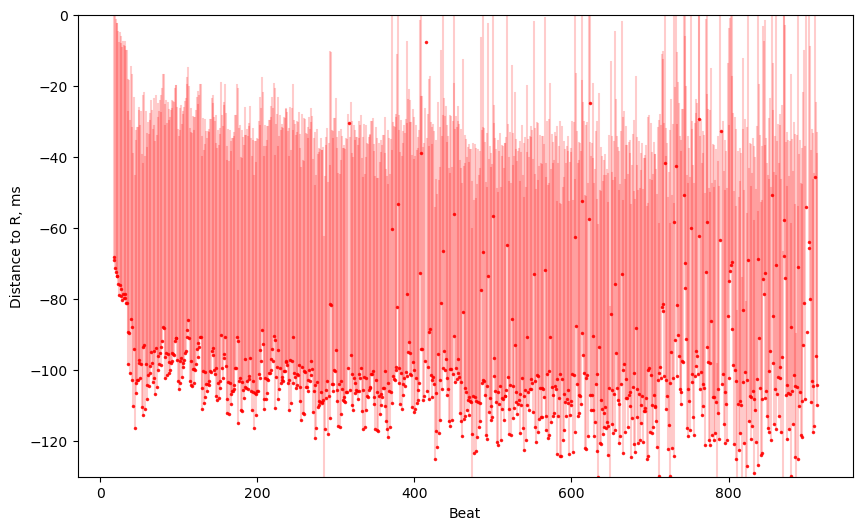

In [29]:
rads = genPhaseData(b, rpeaks['ECG_R_Peaks']*10 ) #b.query('ECG_peaks == 1').index.tolist()

%matplotlib inline
fig = plt.figure(figsize = (10, 6))
plt.axes()    

p4p = rads.query('type == "p"')

plt.plot(p4p.i, p4p.phase/360*p4p.period, 'go', ms=1, alpha = 0.8)

l4p = rads.query('type == "laser"')

plt.plot(l4p.i, l4p.phase/360*l4p.period, 'ro', ms=1.5, alpha = 0.8)

e4p = rads.query('type == "lasend"')
for i in l4p.i:
    thb = l4p.query('i == '+str(i)).iloc[0,2]
    the = e4p.query('i =='+str(i)).iloc[0,2]
    period = l4p.query('i == '+str(i)).iloc[0].period
    plt.plot([i]*100, np.linspace(thb, the, 100)/360*period, 'r-', ms=1.5, alpha = 0.2)
plt.ylim(-130, 0)
plt.ylabel('Distance to R, ms')
plt.xlabel('Beat')

## Sample 342

In [61]:
a = pd.read_csv('./data/peaks_data_342.csv.gz')
a.head()

,Time_s,Laser_V,ECG_ch1,ECG_ch2,Las_peaks,ECG_peaks
0,0.0000,-0.00157,0.01716,-0.01562,NaN,NaN
1,0.0001,-0.00072,0.02099,-0.01647,NaN,NaN
2,0.0002,-0.00157,0.02184,-0.01647,NaN,NaN
3,0.0003,-0.00157,0.02142,-0.01349,NaN,NaN
4,0.0004,-0.00242,0.01971,-0.02115,NaN,NaN


In [62]:
bl = bwr.calc_baseline( a.ECG_ch2.to_numpy() )
a['ch2_bc'] = 0.00
a.loc[:,'ch2_bc'] = a.ECG_ch2.to_numpy() - bl

In [63]:
b = addFilteredDataE(a, 'ch2_bc', comps=3)
b = addFilteredDataE(b, 'ECG_ch2', comps=3)

Mean len of RR interval:  2200
Mean len of RR interval:  4836
Mean len of RR interval:  2200
Mean len of RR interval:  4836


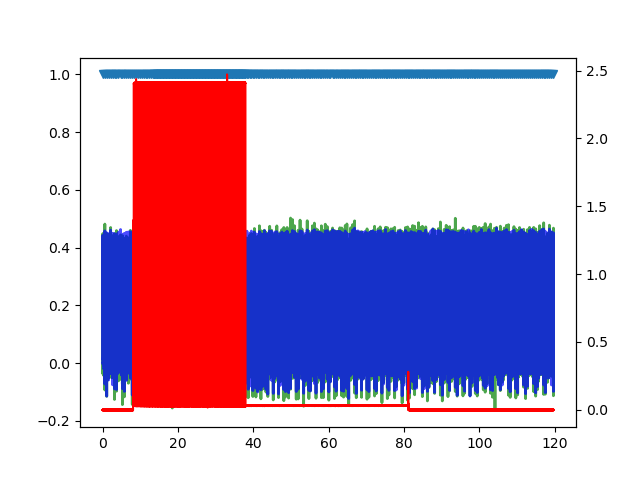

In [64]:
%matplotlib widget
plt.plot(b["Time_s"], -b.ECG_ch2, '-g', lw=2, alpha=0.7)
plt.plot(b["Time_s"], -b.ECG_ch2_dns, '-b', lw=2, alpha=0.7)
plt.plot(b["Time_s"], b.ECG_peaks, 'v', lw=2, alpha=1)
plt.twinx()
plt.plot(b["Time_s"], b.Laser_V, '-r', alpha=1)

**Check R-peak detection**

In [65]:
_, rpeaks = nk.ecg_peaks(-b.ECG_ch2_dns, sampling_rate=5000)
# plot = nk.events_plot(rpeaks['ECG_R_Peaks'], -b.ECG_ch1_dns)

**Check P-peak detection**

In [66]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(-b.ECG_ch2_dns, rpeaks, sampling_rate=5000, method="cwt")

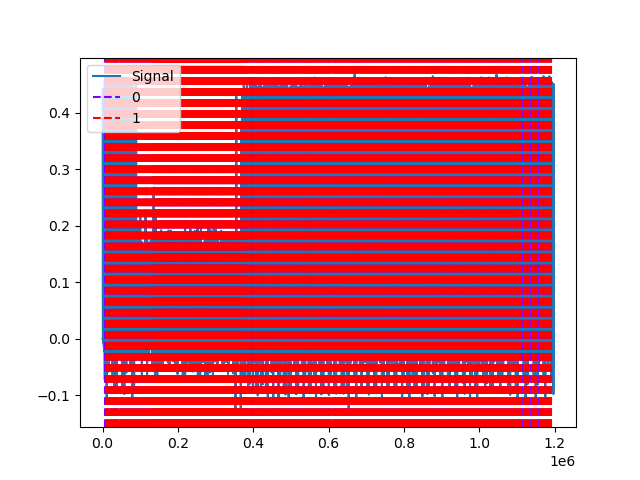

In [67]:
%matplotlib widget
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([rpeaks['ECG_R_Peaks'], 
                       waves_peak['ECG_P_Peaks']], -b.ECG_ch2_dns)

In [68]:
ppks = remove_nans(waves_peak['ECG_P_Peaks'])
b['P_peaks'] = np.nan
b.loc[ppks, 'P_peaks'] = 1

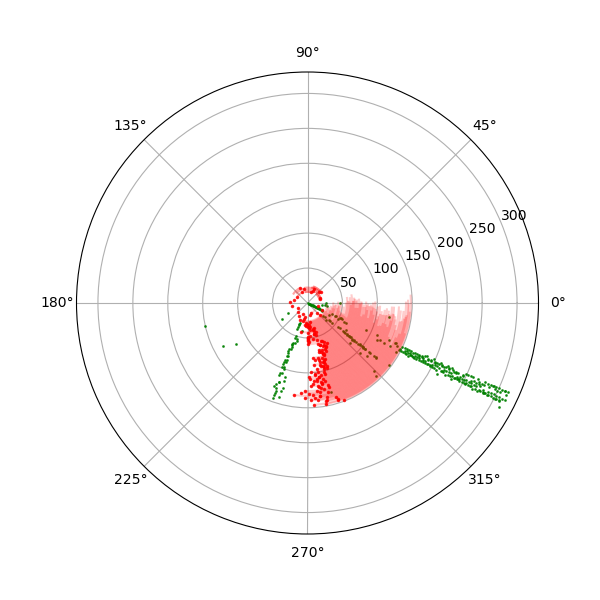

In [69]:
rads = genPhaseData(b, rpeaks['ECG_R_Peaks'] ) #b.query('ECG_peaks == 1').index.tolist()

fig = plt.figure(figsize = (6, 6))
fig.clear()
plt.axes(projection='polar')    

p4p = rads.query('type == "p"')

plt.polar(p4p.phase/180*np.pi, p4p.i, 'go', ms=1, alpha = 0.8)

l4p = rads.query('type == "laser"')

plt.polar(l4p.phase/180*np.pi, l4p.i, 'ro', ms=1.5, alpha = 0.8)

e4p = rads.query('type == "lasend"')
for i in l4p.i:
    thb = l4p.query('i == '+str(i)).iloc[0,2]
    the = e4p.query('i =='+str(i)).iloc[0,2]
    plt.polar(np.linspace(thb, the, 100)/180*np.pi, [i]*100, 'r-', ms=1.5, alpha = 0.2)
plt.show()
#plt.title(f'File №122') # 

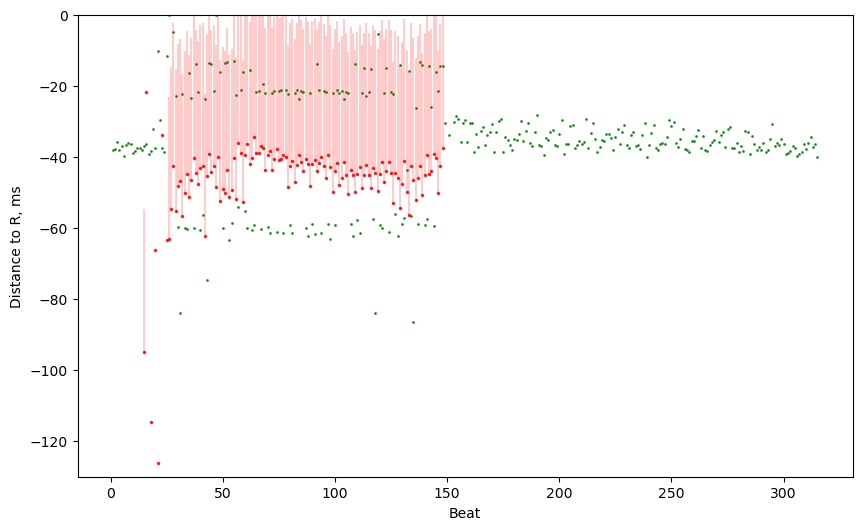

In [71]:
%matplotlib inline
fig = plt.figure(figsize = (10, 6))
fig.clear()

p4p = rads.query('type == "p"')

plt.plot(p4p.i, p4p.phase/360*p4p.period, 'go', ms=1, alpha = 0.8)

l4p = rads.query('type == "laser"')

plt.plot(l4p.i, l4p.phase/360*l4p.period, 'ro', ms=1.5, alpha = 0.8)

e4p = rads.query('type == "lasend"')
for i in l4p.i:
    thb = l4p.query('i == '+str(i)).iloc[0,2]
    the = e4p.query('i =='+str(i)).iloc[0,2]
    period = l4p.query('i == '+str(i)).iloc[0].period
    plt.plot([i]*100, np.linspace(thb, the, 100)/360*period, 'r-', ms=1.5, alpha = 0.2)
plt.ylim(-130, 0)
plt.ylabel('Distance to R, ms')
plt.xlabel('Beat')
plt.show()

## Sample 350

In [72]:
a = pd.read_csv('./data/peaks_data_350.csv.gz')
# a.eval('ch12 = ECG_ch1 - ECG_ch2', inplace=True)
a.head()

,Time_s,Laser_V,ECG_ch1,ECG_ch2,Las_peaks,ECG_peaks
0,0.0000,-0.00200,0.00779,0.01503,NaN,NaN
1,0.0001,-0.00200,0.01163,0.01460,NaN,NaN
2,0.0002,-0.00072,0.00907,0.01716,NaN,NaN
3,0.0003,-0.00200,0.00950,0.01631,NaN,NaN
4,0.0004,-0.00242,0.00652,0.01375,NaN,NaN


In [73]:
bl = bwr.calc_baseline( a.ECG_ch2.to_numpy() )
a['ch2_bc'] = 0.00
a.loc[:,'ch2_bc'] = a.ECG_ch2.to_numpy() - bl

In [74]:
b = addFilteredDataE(a, 'ch2_bc', comps=3)
b = addFilteredDataE(b, 'ECG_ch2', comps=3)
# b = addFilteredData(b, 'ECG_ch2')

Mean len of RR interval:  3986
Mean len of RR interval:  4647
Mean len of RR interval:  3986
Mean len of RR interval:  4647


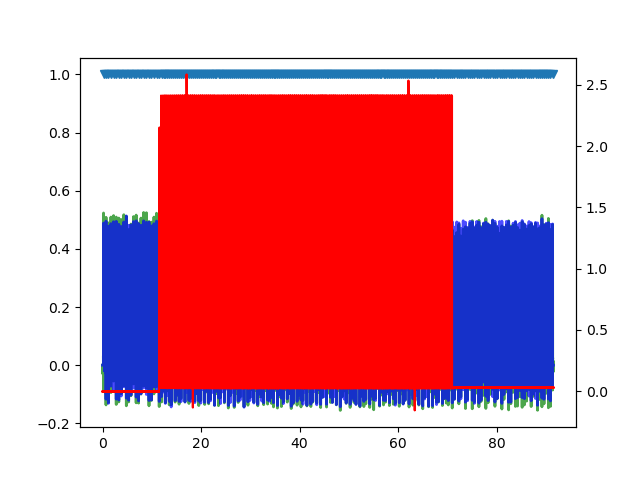

In [75]:
%matplotlib widget
plt.plot(b["Time_s"], -b.ECG_ch2, '-g', lw=2, alpha=0.7)
plt.plot(b["Time_s"], -b.ECG_ch2_dns, '-b', lw=2, alpha=0.7)
plt.plot(b["Time_s"], b.ECG_peaks, 'v', lw=2, alpha=1)
plt.twinx()
plt.plot(b["Time_s"], b.Laser_V, '-r', alpha=1)

**Check R-peak detection**

In [76]:
_, rpeaks = nk.ecg_peaks(-b.ECG_ch2_dns, sampling_rate=5000)
# plot = nk.events_plot(rpeaks['ECG_R_Peaks'], -b.ECG_ch1_dns)

**Check P-peak detection**

In [77]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(-b.ECG_ch2_dns, rpeaks, sampling_rate=5000, method="cwt")

In [55]:
# %matplotlib widget
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
# plot = nk.events_plot([rpeaks['ECG_R_Peaks'], 
#                        waves_peak['ECG_P_Peaks']], -b.ECG_ch2_dns)

In [56]:
ppks = remove_nans(waves_peak['ECG_P_Peaks'])
b['P_peaks'] = np.nan
b.loc[ppks, 'P_peaks'] = 1

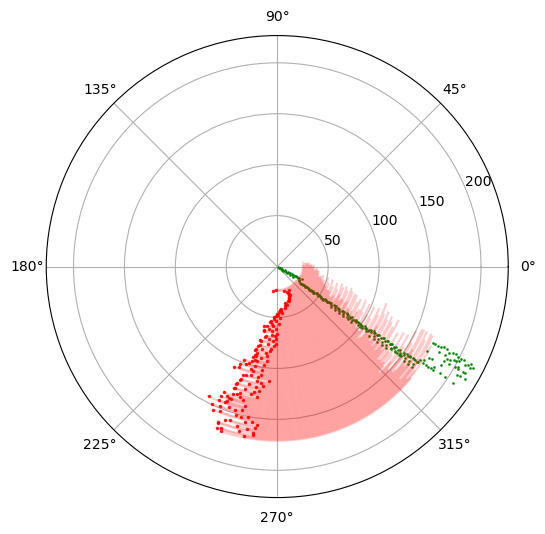

In [60]:
%matplotlib inline
rads = genPhaseData(b, rpeaks['ECG_R_Peaks'] ) #b.query('ECG_peaks == 1').index.tolist()

fig = plt.figure(figsize = (6, 6))
fig.clear()
plt.axes(projection='polar')    

p4p = rads.query('type == "p"')

plt.polar(p4p.phase/180*np.pi, p4p.i, 'go', ms=1, alpha = 0.8)

l4p = rads.query('type == "laser"')

plt.polar(l4p.phase/180*np.pi, l4p.i, 'ro', ms=1.5, alpha = 0.8)

e4p = rads.query('type == "lasend"')
for i in l4p.i:
    thb = l4p.query('i == '+str(i)).iloc[0,2]
    the = e4p.query('i =='+str(i)).iloc[0,2]
    plt.polar(np.linspace(thb, the, 100)/180*np.pi, [i]*100, 'r-', ms=1.5, alpha = 0.2)
plt.show()
#plt.title(f'File №122') # 

Text(0.5, 0, 'Beat')

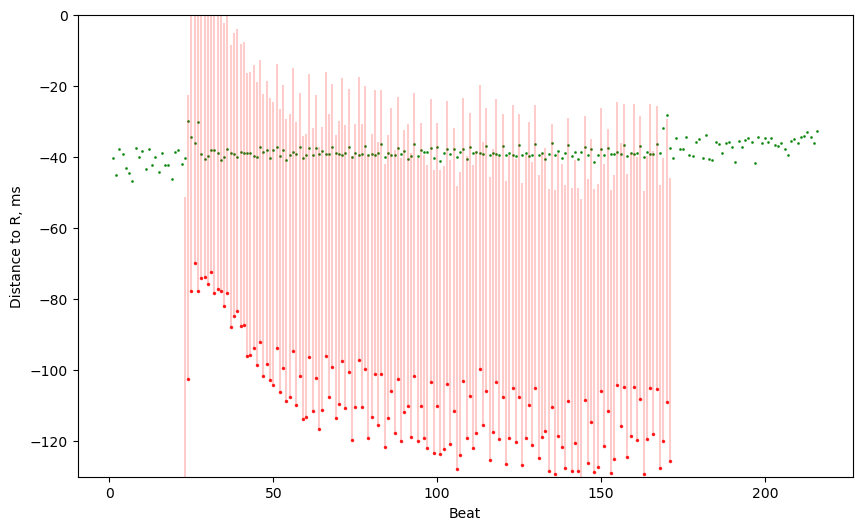

In [58]:
%matplotlib inline
fig = plt.figure(figsize = (10, 6))
plt.axes()    

p4p = rads.query('type == "p"')

plt.plot(p4p.i, p4p.phase/360*p4p.period, 'go', ms=1, alpha = 0.8)

l4p = rads.query('type == "laser"')

plt.plot(l4p.i, l4p.phase/360*l4p.period, 'ro', ms=1.5, alpha = 0.8)

e4p = rads.query('type == "lasend"')
for i in l4p.i:
    thb = l4p.query('i == '+str(i)).iloc[0,2]
    the = e4p.query('i =='+str(i)).iloc[0,2]
    period = l4p.query('i == '+str(i)).iloc[0].period
    plt.plot([i]*100, np.linspace(thb, the, 100)/360*period, 'r-', ms=1.5, alpha = 0.2)
plt.ylim(-130, 0)
plt.ylabel('Distance to R, ms')
plt.xlabel('Beat')

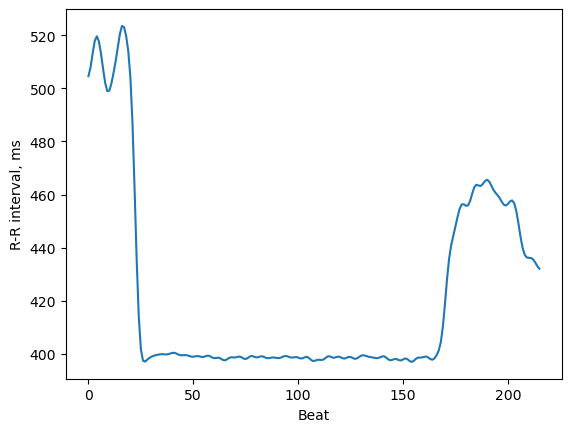

In [59]:
plt.plot( gaussian_filter1d(rads.query('type == "p"').period, sigma=2) )
plt.ylabel('R-R interval, ms')
plt.xlabel('Beat')
plt.show()